In [5]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from scipy.stats import ttest_1samp, shapiro, mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# **Parametric Conditions**

**1. Independent samples**

**2. Normally distributed**

* Shapiro–Wilk test: H0 - Normally distributed
 * if p-value < alpha: It is not normally distributed
    
**3. Equal variances**

* var1/var2 > 4 or var2/var1 > 4- different variances 

# One-Sample Test

In [1]:
df = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

# Average height of plant species: 15cm
# H0: u1 = 15cm  (The fertilizer did not affect the height of the plants)  
# H1: u1 <> 15cm  

In [8]:
alpha=0.05
statistics, pvalue = ttest_1samp( df, popmean=15 )
print( 'p-value: {:.2f}'.format( pvalue ) )

if pvalue < alpha:
    print( '\nReject the null hypothesis' )
else:
    print( '\nFailure to reject the null hypothesis' )

p-value: 0.12

Failure to reject the null hypothesis


# Two-Sample Test (Parametric conditions satisfied)

In [10]:
df1 = [14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12]
df2 = [15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13]

# H0:  u1 = u2 (The average of the heights without fertilizer and with fertilizer are the equal) 
# H1: u1 <> u2

In [12]:
tats1, pvalue1 = shapiro( df1 )
print( 'p-value 1: {}'.format( pvalue1 ) )

tats2, pvalue2 = shapiro( df2 )
print( 'p-value 2: {}'.format( pvalue2 ) )

var1 = np.var(df1)
print( '\nVar 1: {:.2f}'.format( var1 ) )

var2 = np.var(df2)
print( 'Var 2: {:.2f}'.format( var2 ) )

dvar, strvar = (var1/var2, '(Var 1)/(Var 2)') if var1 > var2 else (var2/var1, '(Var 2)/(Var 1)')
print( '{}: {:.2f}'.format(strvar, dvar) )

p-value 1: 0.2267775684595108
p-value 2: 0.6782065033912659

Var 1: 7.73
Var 2: 12.26
(Var 2)/(Var 1): 1.59


1. OK
2. OK
3. OK

**We can use the Two-Sample Test**

In [15]:
alpha=0.05
stats, pvalue = mannwhitneyu( df1, df2 )
print( 'p-value: {}'.format( pvalue ) )

if pvalue < alpha:
    print( '\nReject the null hypothesis' )
else:
    print( '\nFailure to reject the null hypothesis' )

p-value: 0.6236782365071114

Failure to reject the null hypothesis


# Mann-Whitney U-test (Parametric conditions not satisfied)

In [4]:
df1 = [20, 23, 21, 20, 18, 17, 18, 14, 20, 24, 43, 19]
df2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# H0:  u1 = u2 (The average of the heights without fertilizer and with fertilizer are the equal) 
# H1: u1 <> u2

In [15]:
tats1, pvalue1 = shapiro( df1 )
print( 'p-value 1: {}'.format( pvalue1 ) )

stats2, pvalue2 = shapiro( df2 )
print( 'p-value 2: {}'.format( pvalue2 ) )

var1 = np.var(df1)
print( '\nVar 1: {:.2f}'.format( var1 ) )

var2 = np.var(df2)
print( 'Var 2: {:.2f}'.format( var2 ) )

dvar, strvar = (var1/var2, '(Var 1)/(Var 2)') if var1 > var2 else (var2/var1, '(Var 2)/(Var 1)')
print( '{}: {:.2f}'.format(strvar, dvar) )

p-value 1: 0.0005459139938466251
p-value 2: 0.9021514058113098

Var 1: 48.74
Var 2: 9.69
(Var 1)/(Var 2): 5.03


1. OK
2. Not OK - df1 is not normally distributed
3. Not OK - The variances are different

**We can use the Mann-Whitney U-test**

In [19]:
alpha=0.05
stats, pvalue = mannwhitneyu( df1, df2 )
print( 'p-value: {}'.format( pvalue ) )

if pvalue < alpha:
    print( '\nReject the null hypothesis' )
else:
    print( '\nFailure to reject the null hypothesis' )

p-value: 0.07217495133598324

Failure to reject the null hypothesis


# One Way ANOVA

Researchers would like to know if there is a difference between the means obtained with 4 different treatments.

In [53]:
df = pd.DataFrame( {'A':[25, 30, 28, 36, 29], 
                    'B':[45, 55, 29, 56, 40],
                    'C':[30, 29, 33, 37, 27],
                    'D':[54, 60, 51, 62, 73]})

# H0: uA = uB = uC = uD 
# H1: There is a difference

In [47]:
df_melt = pd.melt( df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'] )
df_melt.columns = ['index', 'treatment', 'value']
df_melt.head(10)

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


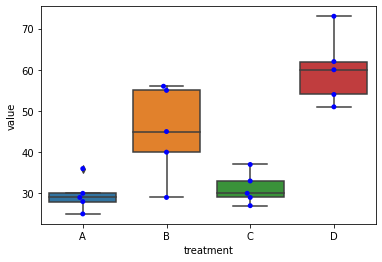

In [48]:
sns.boxplot( x='treatment', y='value', data=df_melt )
sns.swarmplot( x='treatment', y='value', data=df_melt, color='b' );

In [49]:
print( 'pvalue - Group A: {}'.format( shapiro( df['A'] )[1] ) )
print( 'pvalue - Group B: {}'.format( shapiro( df['B'] )[1] ) )
print( 'pvalue - Group C: {}'.format( shapiro( df['C'] )[1] ) )
print( 'pvalue - Group D: {}'.format( shapiro( df['D'] )[1] ) )

print( '\nvariance - Group A: {:.2f}'.format( np.var( df['A'] ) ) )
print( 'variance - Group B: {:.2f}'.format( np.var( df['B'] ) ) )
print( 'variance - Group C: {:.2f}'.format( np.var( df['C'] ) ) )
print( 'variance - Group D: {:.2f}'.format( np.var( df['D'] ) ) )

pvalue - Group A: 0.6075581908226013
pvalue - Group B: 0.5723667740821838
pvalue - Group C: 0.7583119869232178
pvalue - Group D: 0.7002365589141846

variance - Group A: 13.04
variance - Group B: 100.40
variance - Group C: 12.16
variance - Group D: 58.00


In [51]:
alpha = 0.05
stats, pvalue= f_oneway( df['A'], df['B'], df['C'], df['D'] )
print( 'p-value: {}'.format(pvalue) )

if pvalue < alpha:
    print( '\nReject the null hypothesis' )
else:
    print( '\nFailure to reject the null hypothesis' )

p-value: 2.639241146210922e-05

Reject the null hypothesis


* But the variances are not equal, as we can notice

In [58]:
tukey = pairwise_tukeyhsd( endog=df_melt['value'], groups=df_melt['treatment'], alpha=alpha )
print( tukey )

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------


* We can't reject the null hypothesis considering the differences between A and C